In [5]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahathinagalapuram","key":"e36df2609b784c13fa0ea7632b639f22"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 66% 10.0M/15.1M [00:00<00:00, 43.3MB/s]
100% 15.1M/15.1M [00:00<00:00, 59.7MB/s]


In [9]:
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip


Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

In [10]:
import warnings
warnings.filterwarnings('ignore')


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [12]:
ROOT_DIR = "/content/brain_tumor_dataset"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [13]:
number_of_images.items()

dict_items([('no', 98), ('yes', 155)])

In [14]:
import os
import numpy as np
import math

# Root directory where the original dataset is stored
ROOT_DIR = "./brain_tumor_dataset"

# Create the train folder
if not os.path.exists("./train"):
    os.mkdir("./train")

    for dir in os.listdir(ROOT_DIR):
        class_path = os.path.join(ROOT_DIR, dir)
        if not os.path.isdir(class_path):
            continue

        # Get the actual number of images in the directory
        all_images = os.listdir(class_path)
        num_images = len(all_images)

        # Create subdirectory for the class in train folder
        os.makedirs("./train/" + dir, exist_ok=True)

        # Number of images to move to training
        train_size = min(math.floor(0.7 * num_images), num_images)

        # Randomly select images for training
        train_images = np.random.choice(
            a=all_images,
            size=train_size,
            replace=False
        )

        # Move selected images to the train folder
        for img in train_images:
            src = os.path.join(class_path, img)
            dest = os.path.join("./train", dir, img)
            os.rename(src, dest)  # Move the file
else:
    print("Train folder already exists.")


In [15]:
import os
import math
import numpy as np
import shutil

# Root directory where the original dataset is stored
ROOT_DIR = "./brain_tumor_dataset"

def datafolder(p, split):
    # Create the folder if it doesn't exist
    if not os.path.exists("./" + p):
        os.mkdir("./" + p)

        for dir in os.listdir(ROOT_DIR):
            class_path = os.path.join(ROOT_DIR, dir)
            if not os.path.isdir(class_path):
                continue

            # Create subdirectory for the class in the target folder
            os.makedirs("./" + p + "/" + dir, exist_ok=True)

            # Get the list of all images in the class directory
            all_images = os.listdir(class_path)
            num_images = len(all_images)

            # Calculate the number of images to move
            sample_size = min(math.floor(split * num_images), num_images)

            # Randomly select images
            selected_images = np.random.choice(
                a=all_images,
                size=sample_size,
                replace=False
            )

            # Copy selected images to the target folder
            for img in selected_images:
                src = os.path.join(class_path, img)
                dest = os.path.join("./" + p, dir, img)
                shutil.copy(src, dest)
                os.remove(src)  # Optionally remove the image from the source folder
    else:
        print(f"{p} folder exists")

# Example usage
datafolder("val", 0.15)


In [16]:
datafolder("train", 0.7)

train folder exists


In [17]:
datafolder("val", 0.15)

val folder exists


In [18]:
datafolder("test",0.15)

In [19]:
number_of_images={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('no', 23), ('yes', 34)])

In [20]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
import keras

In [21]:
#CNN MODEL
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (224,224,3)))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation = "relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation = "sigmoid"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer="adam", loss = keras.losses.binary_crossentropy , metrics = ["accuracy"])

In [23]:
def preprocessingImages1(path):
  """
  input :Path
  output: Preprocessed images
  """
  image_data = ImageDataGenerator(
      rescale = 1./255,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
  )
  image = image_data.flow_from_directory(
      directory = path,
      target_size = (224,224),
      batch_size = 32,
      class_mode = "binary"
  )
  return image

In [24]:
train_data = preprocessingImages1("/content/train")


Found 176 images belonging to 2 classes.


In [25]:
def preprocessingImages2(path):
       """
       input :Path
       output: Preprocessed images
       """
       image_data = ImageDataGenerator(
           rescale = 1./255,
       )
       image = image_data.flow_from_directory(
           directory = path,
           target_size = (224,224),
           batch_size = 32,
           class_mode = "binary",
           classes=['no', 'yes']
       )
       print(image.class_indices) # Print class names
       print(image.samples) # Print the number of samples found
       print(image.filepaths)  # Add this line to print the paths of the images found

       return image

In [26]:
import os

# Check the 'val' directory
print("Contents of 'val' directory:", os.listdir("/content/val"))

# Check the 'train' directory
print("Contents of 'train' directory:", os.listdir("/content/train"))

# Dynamically check and list images in each subdirectory within 'val'
val_dir = "/content/val"
if os.path.exists(val_dir):
    for sub_dir in os.listdir(val_dir):
        sub_dir_path = os.path.join(val_dir, sub_dir)
        if os.path.isdir(sub_dir_path):
            print(f"Images in 'val/{sub_dir}':", os.listdir(sub_dir_path))
else:
    print("'val' directory not found.")


Contents of 'val' directory: ['no', 'yes']
Contents of 'train' directory: ['no', 'yes']
Images in 'val/no': ['no 2.jpg', '47 no.jpg', 'no 91.jpeg', '25 no.jpg']
Images in 'val/yes': ['Y120.JPG', 'Y184.JPG', 'Y36.JPG', 'Y2.jpg', 'Y117.JPG', 'Y251.JPG', 'Y147.JPG']


In [27]:
val_data = preprocessingImages2("/content/val")


Found 11 images belonging to 2 classes.
{'no': 0, 'yes': 1}
11
['/content/val/no/25 no.jpg', '/content/val/no/47 no.jpg', '/content/val/no/no 2.jpg', '/content/val/no/no 91.jpeg', '/content/val/yes/Y117.JPG', '/content/val/yes/Y120.JPG', '/content/val/yes/Y147.JPG', '/content/val/yes/Y184.JPG', '/content/val/yes/Y2.jpg', '/content/val/yes/Y251.JPG', '/content/val/yes/Y36.JPG']


In [28]:
test_data = preprocessingImages2("/content/test")


Found 9 images belonging to 2 classes.
{'no': 0, 'yes': 1}
9
['/content/test/no/21 no.jpg', '/content/test/no/44no.jpg', '/content/test/no/No16.jpg', '/content/test/yes/Y20.jpg', '/content/test/yes/Y24.jpg', '/content/test/yes/Y250.jpg', '/content/test/yes/Y38.jpg', '/content/test/yes/Y70.jpg', '/content/test/yes/Y85.JPG']


In [29]:
#Early stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stoopiing
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 5, verbose = 1, mode = "auto")

#mdoel check point
mc = ModelCheckpoint(filepath = "best_model.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, mode = "auto")
cd = [es,mc]

In [30]:
#model training
hs = model.fit(train_data,
                         steps_per_epoch=8, epochs=30,
                         verbose = 1, validation_data=val_data,
                         validation_steps=16, callbacks=cd)

Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5307 - loss: 0.7802
Epoch 1: val_accuracy improved from -inf to 0.36364, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5245 - loss: 0.7748 - val_accuracy: 0.3636 - val_loss: 0.6464
Epoch 2/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.5400 - loss: 0.6940
Epoch 2: val_accuracy improved from 0.36364 to 1.00000, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step - accuracy: 0.5626 - loss: 0.6910 - val_accuracy: 1.0000 - val_loss: 0.6164
Epoch 3/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.7241 - loss: 0.6374
Epoch 3: val_accuracy did not improve from 1.00000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.7249 - loss: 0.6327 - val_accuracy: 1.0000 - val_loss: 0.3200
Epoch 4/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.7325 - loss: 0.6108
Epoch 4: val_accuracy did not improve from 1.00000
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accura

In [31]:
print(type(train_data), type(val_data))
print(len(train_data))
print(len(val_data))


<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'> <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
6
1


In [32]:
h=hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

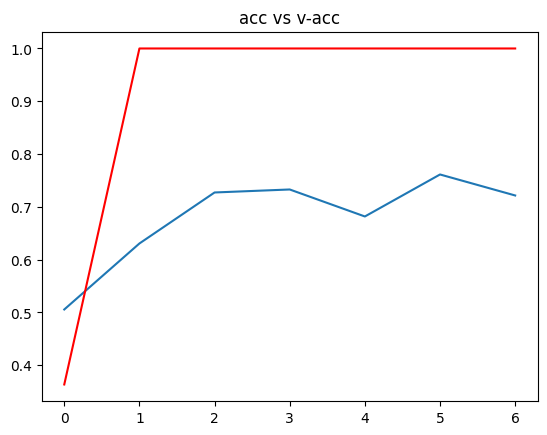

In [33]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

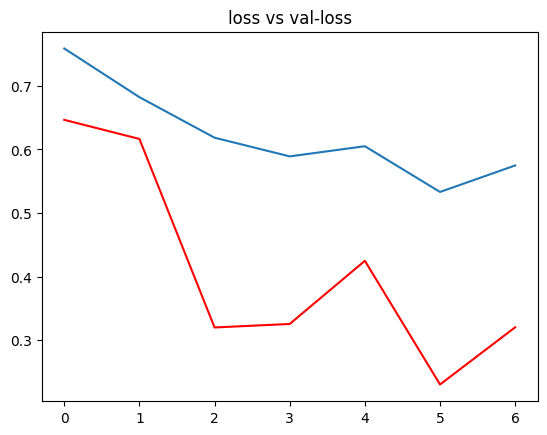

In [34]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs val-loss")
plt.show()

In [35]:
from keras.models import load_model

model = load_model("/content/best_model.keras")

In [36]:
# Replace the line causing the error with the following:
#acc = model.evaluate_generator(test_data)[1]

loss, acc = model.evaluate(test_data)  # Use model.evaluate instead

print(f"The accuracy of the model is {acc*100} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7778 - loss: 0.6382
The accuracy of the model is 77.77777910232544 %


In [37]:
from tensorflow.keras.utils import load_img, img_to_array

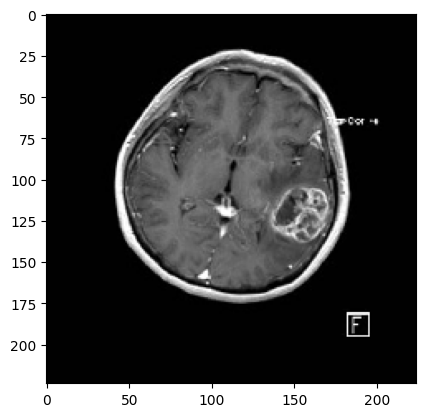

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
The person is healthy


In [38]:
path = "/content/brain_tumor_dataset/yes/Y29.jpg"
img = load_img(path, target_size = (224,224))

i = img_to_array(img)
plt.imshow(img)
plt.show()

i.shape
i = np.expand_dims(i, axis=0)
pred = np.argmax(model.predict(i), axis=-1)[0]
pred

if pred==0:
  print("The person is healthy")
else:
  print("The person has brain tumor")

In [39]:
train_data.class_indices

{'no': 0, 'yes': 1}